Yurag, Marivient Alexia R.

BSCS - IS - 4B

Machine Problem 4: Feature Extraction and Object Detection

Objectives:
1. To apply different feature extraction methods (SIFT, SURF, ORB, HOG, Harris Corner Detection).
2. To perform feature matching using Brute-Force and FLANN matchers.
3. To implement the Watershed algorithm for image segmentation.
4. To visualize and analyze keypoints and matches between images.
5. To evaluate the performance of different feature extraction methods on different images.


Overview:

In this machine problem, you will implement various feature extraction and matching algorithms to
process, analyze, and compare different images. You will utilize techniques such as SIFT, SURF, ORB, HOG,
and Harris Corner Detection to extract keypoints and descriptors. You will also perform feature matching
between pairs of images using the FLANN and Brute-Force matchers. Finally, you will explore image
segmentation using the Watershed algorithm.

**Task 1: Harris Corner Detection**

The Harris Corner detector identifies significant corner points in a grayscale image, making it useful for feature detection in image processing and computer vision tasks.

**Import and install necessary libraries**

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog
from google.colab.patches import cv2_imshow
from skimage import exposure

In [2]:
# Remove any existing OpenCV installations
!pip uninstall -y opencv-python opencv-python-headless opencv-contrib-python

# Install required dependencies
!apt update && apt install -y python3-opencv build-essential cmake git libgtk2.0-dev pkg-config libavcodec-dev libavformat-dev libswscale-dev

# Clone the OpenCV and OpenCV Contrib repositories
!rm -rf opencv opencv_contrib  # Clear any previous installations
!git clone https://github.com/opencv/opencv.git
!git clone https://github.com/opencv/opencv_contrib.git

# Create a build directory and navigate to it
!mkdir -p opencv/build
%cd opencv/build

# Run CMake configuration with OPENCV_ENABLE_NONFREE enabled to include SURF
!cmake -D CMAKE_BUILD_TYPE=Release \
        -D CMAKE_INSTALL_PREFIX=/usr/local \
        -D OPENCV_ENABLE_NONFREE=ON \
        -D OPENCV_EXTRA_MODULES_PATH=../../opencv_contrib/modules \
        -D BUILD_EXAMPLES=OFF ..

# Compile OpenCV (this will take some time)
!make -j8

# Install the compiled OpenCV library
!make install
!ldconfig


Found existing installation: opencv-python 4.10.0.84
Uninstalling opencv-python-4.10.0.84:
  Successfully uninstalled opencv-python-4.10.0.84
Found existing installation: opencv-python-headless 4.10.0.84
Uninstalling opencv-python-headless-4.10.0.84:
  Successfully uninstalled opencv-python-headless-4.10.0.84
Found existing installation: opencv-contrib-python 4.10.0.84
Uninstalling opencv-contrib-python-4.10.0.84:
  Successfully uninstalled opencv-contrib-python-4.10.0.84
Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hi

In [1]:
import cv2

try:
    # Attempt to create a SURF detector
    surf = cv2.xfeatures2d.SURF_create()
    print("SURF is available.")
except AttributeError:
    print("SURF is not available.")


SURF is available.


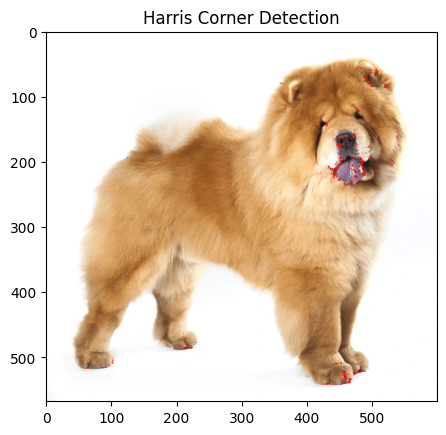

In [17]:
#Task 1: Harris Corner Detection

def harris_corner_detection(image_path):
  # Load the image
    img = cv2.imread('/content/dog1.png')
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Harris Corner Detection
    gray = np.float32(gray_img)
    corners = cv2.cornerHarris(gray, blockSize=2, ksize=3, k=0.04)

    # Mark corners on the original image
    img[corners > 0.01 * corners.max()] = [0, 0, 255]

    # Display the result
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Harris Corner Detection')
    plt.show()
harris_corner_detection('/content/dog1.png')


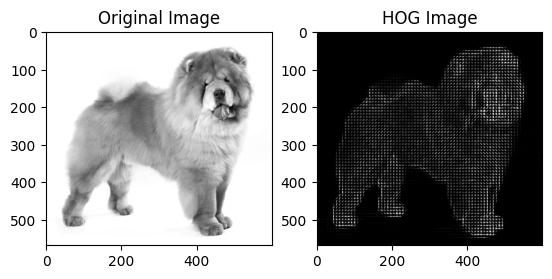

In [8]:
# HOG Feature Extraction
def hog_feature_extraction(image_path):
   # Extract HOG feature
  img = cv2.imread('/content/dog1.png')
  gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  hog_feature, hog_image = hog(gray_image, pixels_per_cell=(8, 8), cells_per_block=(2, 2),
                                  visualize=True, feature_vector=True)

  hog_image_rescale = exposure.rescale_intensity(hog_image, in_range=(0, 10))

  # Display the original the HOG images
  plt.subplot(1, 2, 1)
  plt.imshow(gray_image, cmap='gray')
  plt.title('Original Image')

  plt.subplot(1, 2, 2)
  plt.imshow(hog_image_rescale, cmap='gray')
  plt.title('HOG Image')
  plt.show()
hog_feature_extraction('/content/dog1.png')

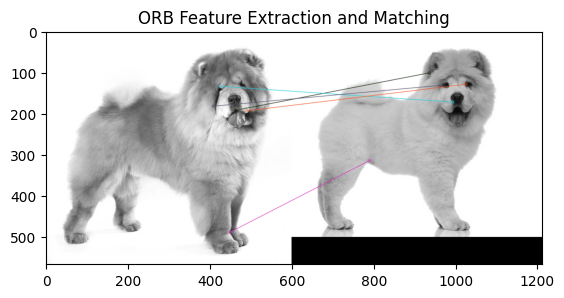

In [16]:
#Task 3: ORB Feature Extraction and Matching

def orb_feature_matching(image_path1, image_path2):
    # Load the images in grayscale
    img1 = cv2.imread(image_path1, cv2.IMREAD_GRAYSCALE)
    img2 = cv2.imread(image_path2, cv2.IMREAD_GRAYSCALE)

    # ORB detector
    orb = cv2.ORB_create()

    # Find keypoints and descriptors with ORB
    kp1, des1 = orb.detectAndCompute(img1, None)
    kp2, des2 = orb.detectAndCompute(img2, None)

    # FLANN-based matcher setup
    FLANN_INDEX_LSH = 6
    index_params = dict(algorithm=FLANN_INDEX_LSH, table_number=6, key_size=12, multi_probe_level=1)
    search_params = dict(checks=50)
    flann = cv2.FlannBasedMatcher(index_params, search_params)

    # Match descriptors using KNN
    matches = flann.knnMatch(des1, des2, k=2)

    good_matches = []
    for match in matches:
        if len(match) == 2:  # Ensure there are two matches (m, n)
            m, n = match
            if m.distance < 0.7 * n.distance:
                good_matches.append(m)

    # Check if there are any good matches
    if len(good_matches) > 0:
        # Draw matching keypoints
        matched_image = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
        # Display the matched image
        plt.imshow(matched_image)
        plt.title('ORB Feature Extraction and Matching')
        plt.show()
    else:
        print("No good matches found between the images.")

# Run the function
orb_feature_matching('/content/dog1.png', '/content/dog2.png')


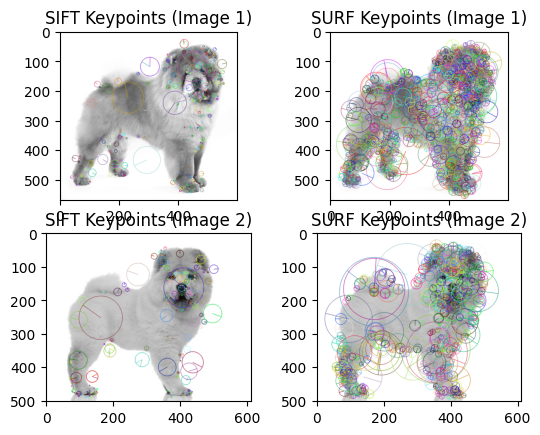

In [26]:
#Task 4: SIFT and SURF Feature Extraction

def sift_and_surf_feature_extraction(image_path1, image_path2):
    # Load the images in grayscale
    img1 = cv2.imread(image_path1, cv2.IMREAD_GRAYSCALE)
    img2 = cv2.imread(image_path2, cv2.IMREAD_GRAYSCALE)

    # SIFT detector
    sift = cv2.SIFT_create()
    kp1, des1 = sift.detectAndCompute(img1, None)
    kp2, des2 = sift.detectAndCompute(img2, None)

    # SURF detector (ensure you have opencv-contrib-python installed)
    surf = cv2.xfeatures2d.SURF_create()
    kp1_surf, des1_surf = surf.detectAndCompute(img1, None)
    kp2_surf, des2_surf = surf.detectAndCompute(img2, None)

    # Draw keypoints for both SIFT and SURF
    img1_sift_kp = cv2.drawKeypoints(img1, kp1, None, flags=cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS)
    img1_surf_kp = cv2.drawKeypoints(img1, kp1_surf, None, flags=cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS)

    img2_sift_kp = cv2.drawKeypoints(img2, kp2, None, flags=cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS)
    img2_surf_kp = cv2.drawKeypoints(img2, kp2_surf, None, flags=cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS)

    # Display SIFT and SURF keypoints for both images
    plt.subplot(2, 2, 1)
    plt.imshow(img1_sift_kp, cmap='gray')
    plt.title('SIFT Keypoints (Image 1)')

    plt.subplot(2, 2, 2)
    plt.imshow(img1_surf_kp, cmap='gray')
    plt.title('SURF Keypoints (Image 1)')

    plt.subplot(2, 2, 3)
    plt.imshow(img2_sift_kp, cmap='gray')
    plt.title('SIFT Keypoints (Image 2)')

    plt.subplot(2, 2, 4)
    plt.imshow(img2_surf_kp, cmap='gray')
    plt.title('SURF Keypoints (Image 2)')

    plt.show()

# Run the function
sift_and_surf_feature_extraction('/content/dog1.png', '/content/dog2.png')


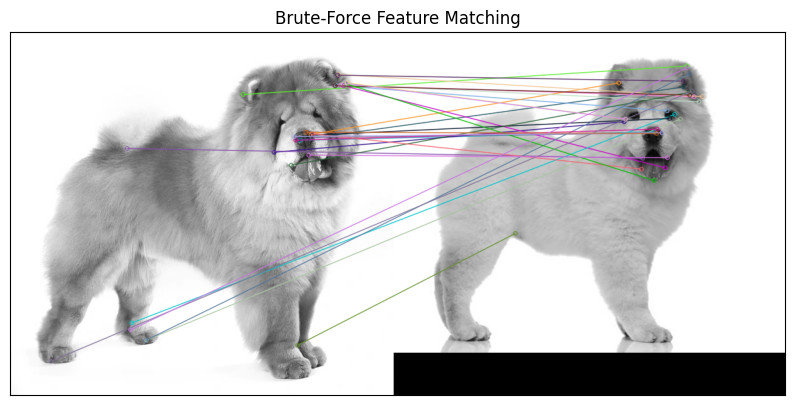

In [23]:
#Task 5: Feature Matching using Brute-Force Matcher

def brute_force_feature_matching(image_path1, image_path2):
    # Initialize ORB detector
    orb = cv2.ORB_create()
    img1 = cv2.imread(image_path1, cv2.IMREAD_GRAYSCALE)
    img2 = cv2.imread(image_path2, cv2.IMREAD_GRAYSCALE)

    # Find the keypoints and descriptors with ORB
    kp1, des1 = orb.detectAndCompute(img1, None)
    kp2, des2 = orb.detectAndCompute(img2, None)
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

    # Match descriptors
    matches = bf.match(des1, des2)
    matches = sorted(matches, key=lambda x: x.distance)
    matched_image = cv2.drawMatches(img1, kp1, img2, kp2, matches[:30], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    # Convert the image to RGB for displaying with matplotlib
    matched_image_rgb = cv2.cvtColor(matched_image, cv2.COLOR_BGR2RGB)

    # Display the matched keypoints using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(matched_image_rgb)
    plt.title('Brute-Force Feature Matching')
    plt.xticks([])
    plt.yticks([])
    plt.show()

# Example usage
brute_force_feature_matching('/content/dog1.png', '/content/dog2.png')


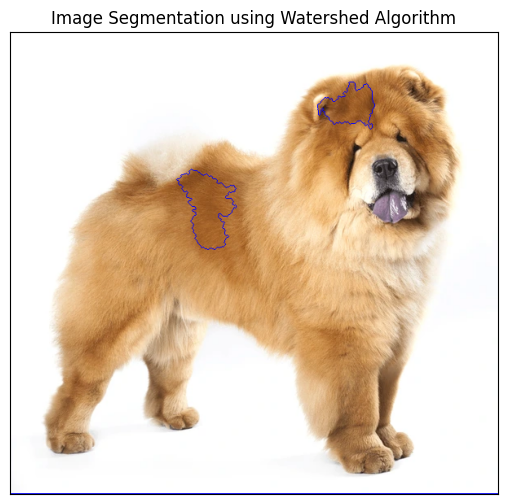

In [27]:
#Task 6: Image Segmentation using Watershed Algorithm

def watershed_segmentation(image_path):
    # Load the image
    img = cv2.imread(image_path)

    # Convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)

    # Noise removal using morphological operations
    kernel = np.ones((3, 3), np.uint8)
    opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)
    sure_bg = cv2.dilate(opening, kernel, iterations=3)

    # Finding sure foreground area
    dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
    _, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

    # Identifying unknown regions
    unknown = cv2.subtract(sure_bg, np.uint8(sure_fg))

    # Marker labelling
    _, markers = cv2.connectedComponents(np.uint8(sure_fg))
    markers = markers + 1
    markers[unknown == 255] = 0

    # Apply the Watershed algorithm
    markers = cv2.watershed(img, markers)
    img[markers == -1] = [255, 0, 0]  # Mark boundaries in red

    # Convert BGR to RGB for matplotlib
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Display the segmented image with matplotlib
    plt.figure(figsize=(8, 6))
    plt.imshow(img_rgb)
    plt.title('Image Segmentation using Watershed Algorithm')
    plt.xticks([])
    plt.yticks([])
    plt.show()

# Example usage
watershed_segmentation('/content/dog1.png')
